# Projeto 2 - Análise da População Brasileira

João Victor Dell Agli Floriano, 10799783

Neste trabalho, estudaremos a evolução da população brasileira ao longo dos anos por meio de três problemas:
1. Segundo o IBGE,  a população brasileira em 2010 era 190.755.799 habitantes e em 2020  era 203.062.512. Supondo crescimento exponencial a taxa constante, calcule a taxa de crescimento anual da população.
2. Suponha que a taxa de morte por ano seja constante e igual a  $d = \frac{1}{70}$ e que o número de homens sempre iguale o número de mulheres. Qual seria a taxa de nascimentos $f$ por ano no Brasil? Em média, quantos filhos  uma brasileira teria durante sua vida? Quantos filhos as brasileiras poderiam ter e ainda assim a população permanecer constante? *Suponha que as mulheres sejam férteis durante toda a vida, que dura em média 70 anos.*
3. Usando a série histórica da população brasileira (1872-2020) dada em [https://pt.wikipedia.org/wiki/Demografia_do_Brasil](https://pt.wikipedia.org/wiki/Demografia_do_Brasil), faça um ajuste com a curva logística como Verhulst fez para a população da Bélgica (veja notas de aula). Funciona? Use uma rotina de fitting pronta de algum pacote gráfico.

Para isso, usaremos os seguintes pacotes:

In [1]:
#%pip install pandas
#%pip install scipy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

Caso não possua `scipy` ou `pandas` instalado, descomente as primeiras duas linhas e rode a célula acima.

## Problemas

### Segundo o IBGE,  a população brasileira em 2010 era 190.755.799 habitantes e em 2020  era 203.062.512. Supondo crescimento exponencial a taxa constante, calcule a taxa de crescimento anual da população.

Para calcular a taxa de crescimento $r$ da população nesse intervalo, supondo um crescimento exponencial a taxa constante, basta nos basearmos nesse modelo, que diz que uma população em um tempo $t$, a partir do seu valor inicial $P_0$, é:

$$P_1 = P_0 + rP_0$$

Que também pode ser traduzido como:

$$P_1 = \lambda P_0$$

Sendo $\lambda = 1 + f - d = 1 + r$

Em um tempo $t$, a equação acima fica:

$$P_t = (1 + r)^tP_0$$

Portanto, para descobrirmos $r$ em $t = 10$ sabendo $P_{2020}$ e $P_{2010}$:

$$r = (\frac{P_{2020}}{P_{2010}})^{\frac{1}{10}} - 1$$

In [2]:
p_2010 = 190755799.0
p_2020 = 203062512.0

r = (p_2020/p_2010)**(1/10.0) - 1

print("Supondo crescimento exponencial a taxa constante, a taxa de crescimento anual da população é de:", format(r, ".2%"))

Supondo crescimento exponencial a taxa constante, a taxa de crescimento anual da população é de: 0.63%


### Suponha que a taxa de morte por ano seja constante e igual a  $d = \frac{1}{70}$ e que o número de homens sempre iguale o número de mulheres. Qual seria a taxa de nascimentos $f$ por ano no Brasil? Em média, quantos filhos  uma brasileira teria durante sua vida? Quantos filhos as brasileiras poderiam ter e ainda assim a população permanecer constante? *Suponha que as mulheres sejam férteis durante toda a vida, que dura em média 70 anos.*

Sendo $\lambda = 1 + f - d$, considerando $d = \frac{1}{70}$ e o $\lambda$ anterior, $f$ é calculado como:

In [3]:
d = 1/70.0
f = r + d

print(format(f, ".2%"))

2.06%


Baseando-se nessa taxa de nascimentos anual, é possível calcular a quantidade de filhos que uma mulher consegue ter ao longo da vida. Supondo que a cada ano um indivíduo qualquer acumule $f$ filho, e baseando-se na suposição do enunciado de que a quantidade de homens se equivale à quantidade de mulheres, pode-se calcular a quantidade de filhos que uma mulher vai acumular após 70 anos como a quantidade de filhos que um casal irá acumular, ou seja, $2\cdot f \cdot 70$, sendo :



In [4]:
T = 70
print(f"Uma mulher terá {round(2*f*T, 2)} filho ao longo de 70 anos.")

Uma mulher terá 2.88 filho ao longo de 70 anos.


Para que a população permanecesse constante, a taxa de nascimentos deve se igualar à de nascimentos, ou seja, ser de $f = \frac{1}{70}$, que nos permite calcular a quantidade de filhos os quais uma mulher pode ter durante sua vida fértil:

In [13]:
f = 1/70.0

n_filhos = round(2*f*T, 2)

print(f"Cada mulher poderia ter, em média, {n_filhos} filho durante sua vida fértil para que a população permanecesse constante.")

Cada mulher poderia ter, em média, 2.0 filho durante sua vida fértil para que a população permanecesse constante.


### Usando a série histórica da população brasileira (1872-2020) dada em [https://pt.wikipedia.org/wiki/Demografia_do_Brasil](https://pt.wikipedia.org/wiki/Demografia_do_Brasil), faça um ajuste com a curva logística como Verhulst fez para a população da Bélgica (veja notas de aula). Funciona? Use uma rotina de fitting pronta de algum pacote gráfico.

Primeiro, importemos os dados, os quais podem ser achados em [https://censo2022.ibge.gov.br/panorama](https://censo2022.ibge.gov.br/panorama):

In [6]:
dados_cru = pd.read_csv("..\..\dados\censo.csv")

print(dados_cru)

    Ano da pesquisa  População(pessoas)
0              1872             9930478
1              1890            14333915
2              1900            17438434
3              1920            30635605
4              1940            41236315
5              1950            51944397
6              1960            70992343
7              1970            94508583
8              1980           121150573
9              1991           146917459
10             2000           169590693
11             2010           190755799
12             2022           203062512


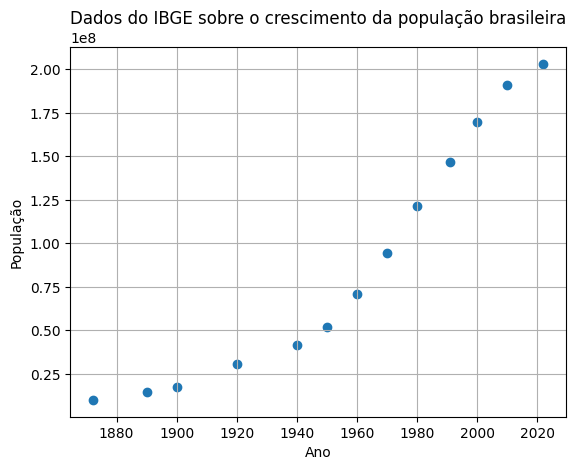

In [7]:
dados = np.array([dados_cru["Ano da pesquisa"], dados_cru["População(pessoas)"]])

plt.scatter(dados[0], dados[1])
plt.title("Dados do IBGE sobre o crescimento da população brasileira")
plt.xlabel("Ano")
plt.ylabel("População")
plt.grid()

A partir da curva logística de Velhurst, definida como:

$$P = \frac{C}{e^{-rt} + \frac{C}{K}}$$

Sendo $r$ a taxa de crescimento da população, $K$ a capacidade de suporte da população, e C:

$$C = \frac{P_0}{1 - \frac{P_0}{K}}$$

In [8]:
def velhurst(t : np.ndarray, r : float, P_0 : float, K : float):
    t = t - t[0]
    C = P_0/(1.0 - (P_0/K))
    return C/(np.exp(-r*t) + (C/K))

Pretendemos encontrar uma curva aproximada para os dados existentes. Poderíamos procurar chutar valores até que a curva se encaixasse, porém como visto abaixo, com base nos dados que temos, é algo complicado de se fazer na mão:

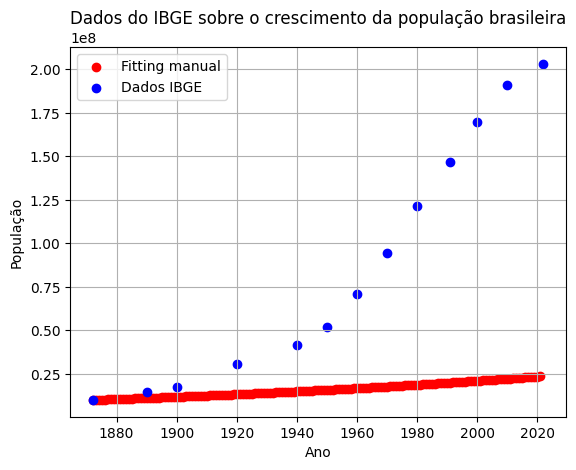

In [9]:
t = np.arange(dados[0, 0], dados[0, -1], 1, dtype = float)
vel = velhurst(t, r, dados[1, 0], dados[1, -1])

plt.scatter(t, vel, c = "red", label = "Fitting manual")
plt.scatter(dados[0], dados[1], c = "blue", label = "Dados IBGE")
plt.title("Dados do IBGE sobre o crescimento da população brasileira")
plt.xlabel("Ano")
plt.ylabel("População")
plt.legend()
plt.grid()

Para fazer esse trabalho, usaremos a função de fitting `curve_fit` do módulo `optimize`, da biblioteca `scipy`. Essa função recebe como parâmetros a função a qual deseja se encontrar uma aproximação para os parâmetros, os dados em x e y, além de alguns parâmetros adicionais de ajuda, como os chutes iniciais para cada parâmetro, assim como os limites inferior e superior para encontrar os mesmos, definidos respectivmente como `p0` e `bounds`. Ela retorna, enfim, uma aproximação dos parâmetros da curva que melhor se encaixa nos dados passados, assim como sua covariância:

In [10]:
parameters, pcov = curve_fit(velhurst, dados[0], dados[1], p0 = [1.0, min(dados[1]), max(dados[1])], 
                               bounds = ([0.0, 0.0, 0.0], [3.0, np.inf, np.inf]))

print(f"r = {parameters[0]}, P_0 = {parameters[1]}, K = {parameters[2]}")

r = 0.03516602969591646, P_0 = 4704702.570341411, K = 268764198.3744305


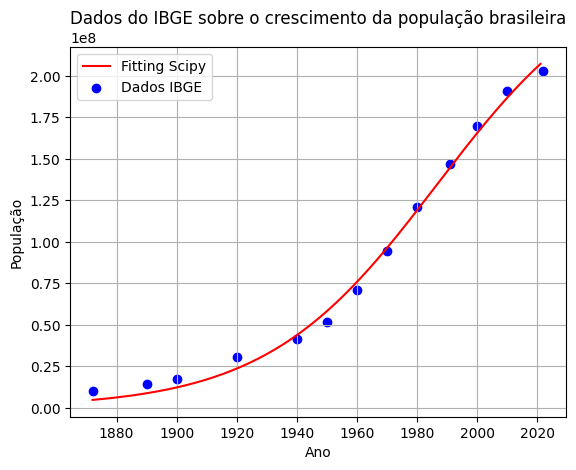

In [11]:
vel = velhurst(t, *parameters)

plt.plot(t, vel, c = "red", label = "Fitting Scipy")
plt.scatter(dados[0], dados[1], c = "blue", label = "Dados IBGE")
plt.title("Dados do IBGE sobre o crescimento da população brasileira")
plt.xlabel("Ano")
plt.ylabel("População")
plt.legend()
plt.grid()

Que nos permite, inclusive, estimar qual deve ser o tamanho da população brasileira em 2100:

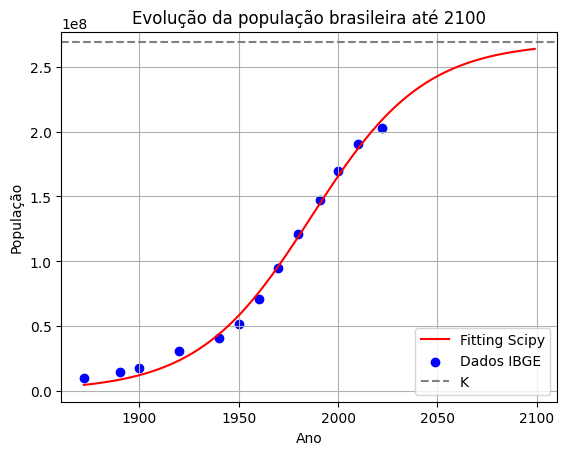

In [12]:
t = np.arange(dados[0, 0], 2100, 1)
vel = velhurst(t, *parameters)

plt.plot(t, vel, c = "red", label = "Fitting Scipy")
plt.scatter(dados[0], dados[1], c = "blue", label = "Dados IBGE")
plt.axhline(y = parameters[2], xmin = 0.0, xmax = 2200, linestyle = "--", c = "gray", label = "K")
plt.title("Evolução da população brasileira até 2100")
plt.xlabel("Ano")
plt.ylabel("População")
plt.legend()
plt.grid()